In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))

In [3]:
features = [
    'tvghorseweight', 
    'tvghorseage', 
    'tvghorsedaysoff', 
    'tvghorsenumberofwins', 
    'tvghorsepowerrating', 
    'tvghorseaverageclassrating',
    'tvghorseaveragespeed'
]
target = 'won'

In [4]:
X_train = train[features]
y_train = train[target].values.reshape(-1,1)

In [5]:
X_test = test[features]
y_test = test[target].values.reshape(-1,1)

# Machine Learning Models

## SVM

### Training the SVM model and finding a score

In [6]:
from sklearn.svm import SVC

from sklearn.svm import SVC 
model_svm = SVC(kernel='sigmoid')
model_svm
model_svm.fit(X_train, y_train)
train_score_svm = model_svm.score(X_train, y_train)
test_score_svm = model_svm.score(X_test, y_test)
predictions_svm = model_svm.predict(X_test)

print(f'''
R\u00b2 Scores
-----------------------
Training Score: {100*round(train_score_svm,4)}%
Test Score:     {100*round(test_score_svm,4)}%
''')



R² Scores
-----------------------
Training Score: 82.44%
Test Score:     87.83%



### SVM Classification Report

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_svm,
                            target_names=["win", "lost"]))

              precision    recall  f1-score   support

         win       0.91      0.97      0.94      1813
        lost       0.05      0.02      0.02       184

    accuracy                           0.88      1997
   macro avg       0.48      0.49      0.48      1997
weighted avg       0.83      0.88      0.85      1997



### Visualising the test and predicted data

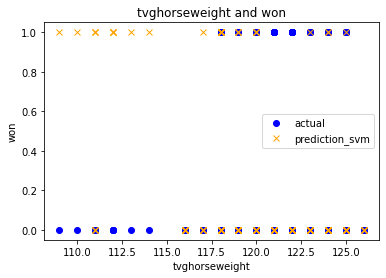

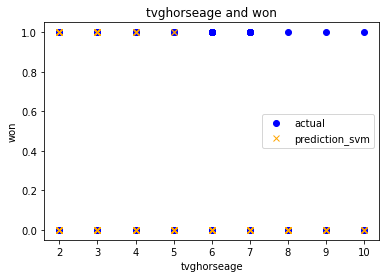

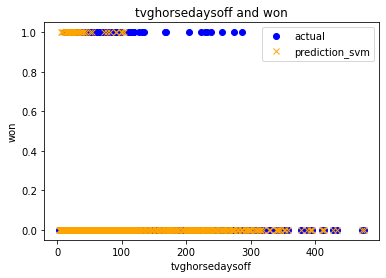

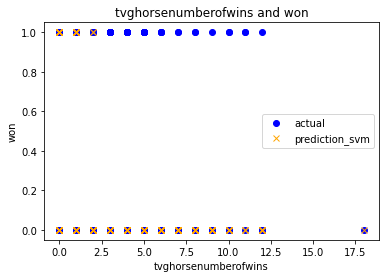

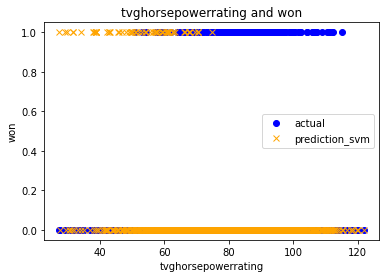

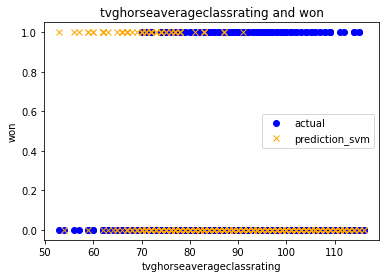

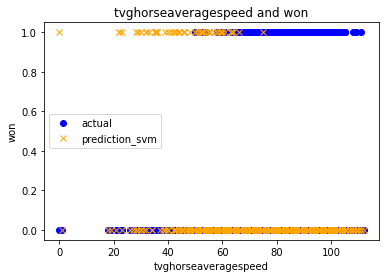

In [8]:
for i in features:
    plt.plot(X_test[i], y_test, 'o', color='blue',label='actual')
    plt.plot(X_test[i], predictions_svm,'x',color='orange',label='prediction_svm')
    plt.xlabel(i)
    plt.ylabel(target)
    plt.legend()
    plt.title(f'{i} and {target}')
    plt.show()

## XGBoost

### Training the XGBoost Classifier and finding a score

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
# make predictions for test data
y_pred = model_XGB.predict(X_test)
predictions_XGB = [value for value in y_pred]

accuracy_XGB = accuracy_score(y_test, predictions_XGB)
print("Accuracy score for testing")
print(f"Testing Accuracy: {round(accuracy_XGB,4) * 100.0}%"  )

from sklearn.model_selection import cross_val_score
scores_XGB = cross_val_score(model_XGB, X_train, y_train, cv=5)
print('Cross Validation for Training')
print(f"Training Accuracy: {round(accuracy_XGB,4)*100}%")

Accuracy score for testing
Testing Accuracy: 92.34%
Cross Validation for Training
Training Accuracy: 92.34%


### XGBoost Classification Report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_XGB,
                            target_names=["win", "lost"]))

              precision    recall  f1-score   support

         win       0.92      1.00      0.96      1813
        lost       1.00      0.17      0.29       184

    accuracy                           0.92      1997
   macro avg       0.96      0.58      0.62      1997
weighted avg       0.93      0.92      0.90      1997



### Visualising the test and predicted data

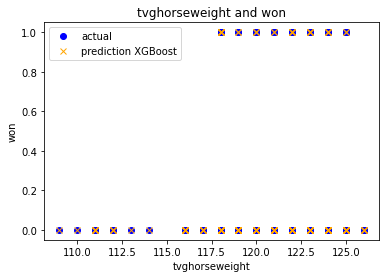

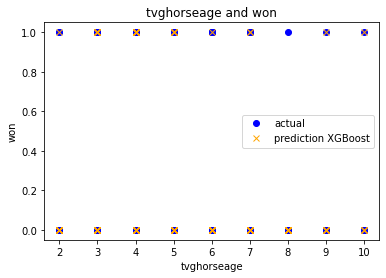

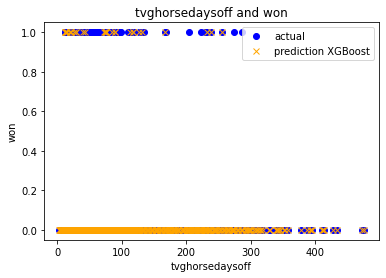

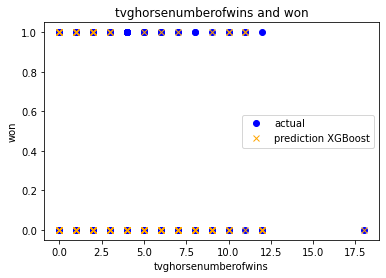

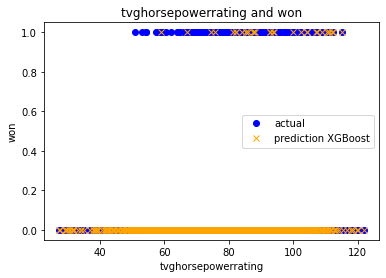

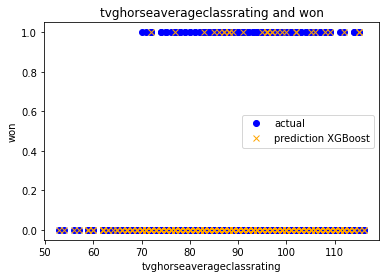

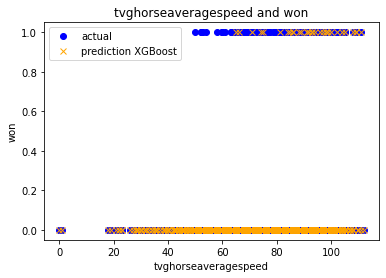

In [11]:
for i in features:
    plt.plot(X_test[i], y_test, 'o', color='blue',label='actual')
    plt.plot(X_test[i], predictions_XGB,'x',color='orange',label='prediction XGBoost')
    plt.xlabel(i)
    plt.ylabel(target)
    plt.legend()
    plt.title(f'{i} and {target}')
    plt.show()

## Naive-Bayes Gaussian Classifier

### Training the Naive-Bayes Gaussian model and finding a score

In [12]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

train_score_nb = model_nb.score(X_train, y_train)
test_score_nb = model_nb.score(X_test, y_test)

predictions_nb = model_nb.predict(X_test)
model_nb.score(X_test, predictions_nb)

print(f'''
R\u00b2 Scores
-----------------------
Training Score: {100*round(train_score_nb,4)}%
Test Score:     {100*round(test_score_nb,4)}%
''')


R² Scores
-----------------------
Training Score: 88.91%
Test Score:     89.58%



### SVM Classification Report

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_nb,
                            target_names=["win", "lost"]))

              precision    recall  f1-score   support

         win       0.91      0.98      0.94      1813
        lost       0.15      0.03      0.05       184

    accuracy                           0.90      1997
   macro avg       0.53      0.51      0.50      1997
weighted avg       0.84      0.90      0.86      1997



### Visualising the test and predicted data

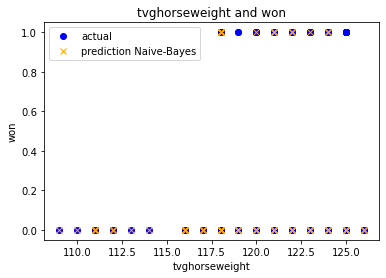

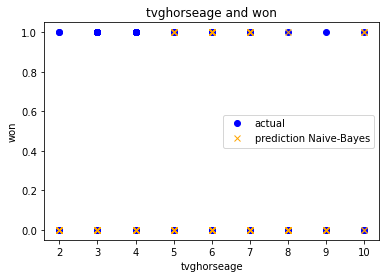

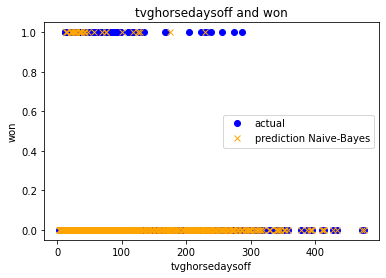

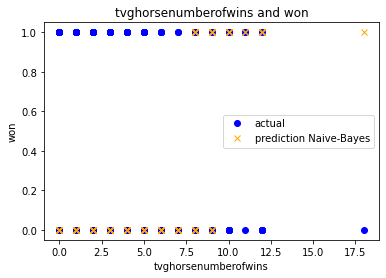

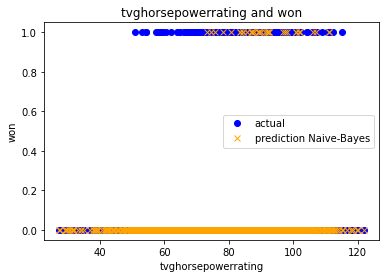

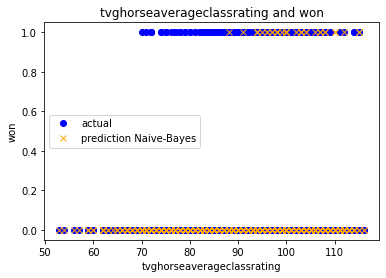

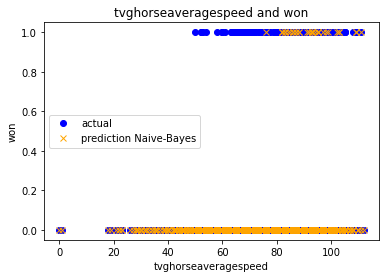

In [14]:
for i in features:
    plt.plot(X_test[i], y_test, 'o', color='blue',label='actual')
    plt.plot(X_test[i], predictions_nb,'x',color='orange',label='prediction Naive-Bayes')
    plt.xlabel(i)
    plt.ylabel(target)
    plt.legend()
    plt.title(f'{i} and {target}')
    plt.show()

Creating the DataFrame for the predicted data

In [15]:
test_copy = test.copy()

In [16]:
test_copy['won_SVM'] = predictions_svm

In [17]:
test_copy['won_XGBoost'] = predictions_XGB

In [18]:
test_copy['won_GaussianNB'] = predictions_nb

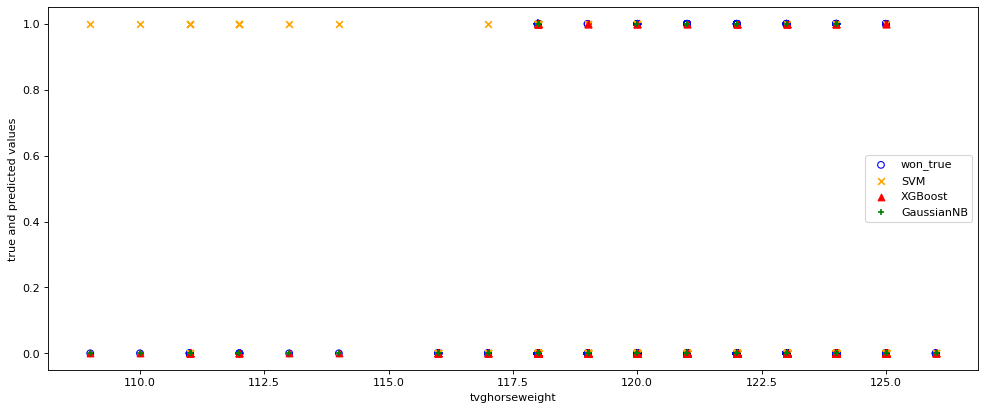

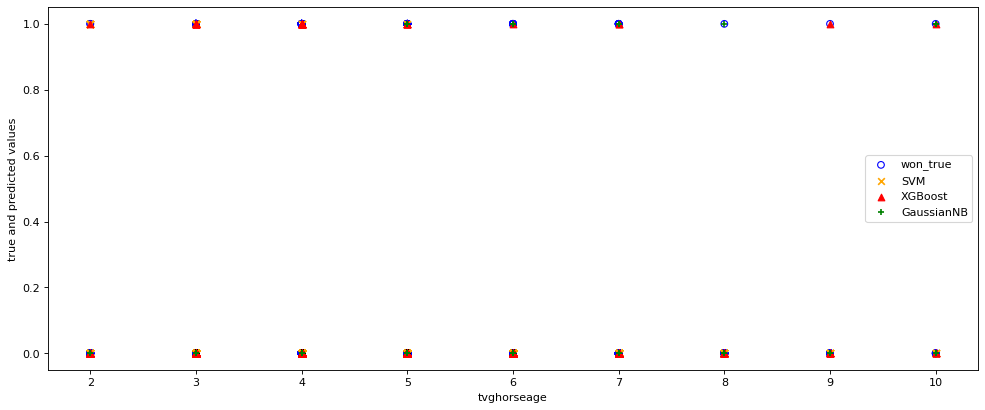

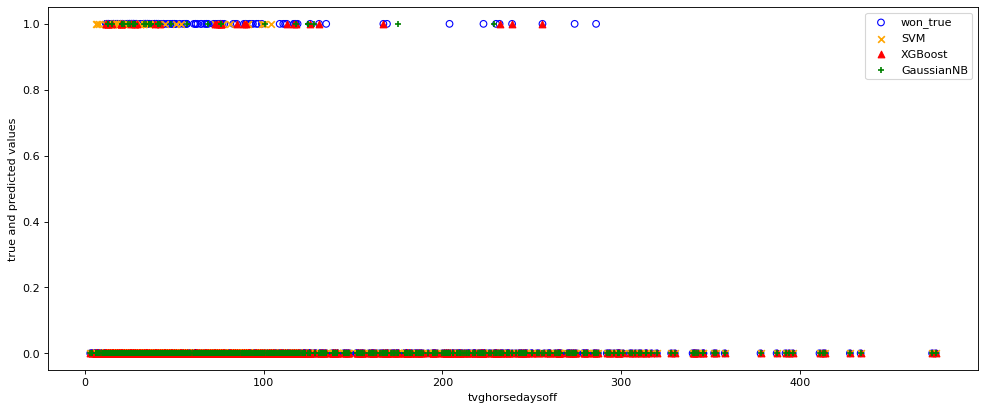

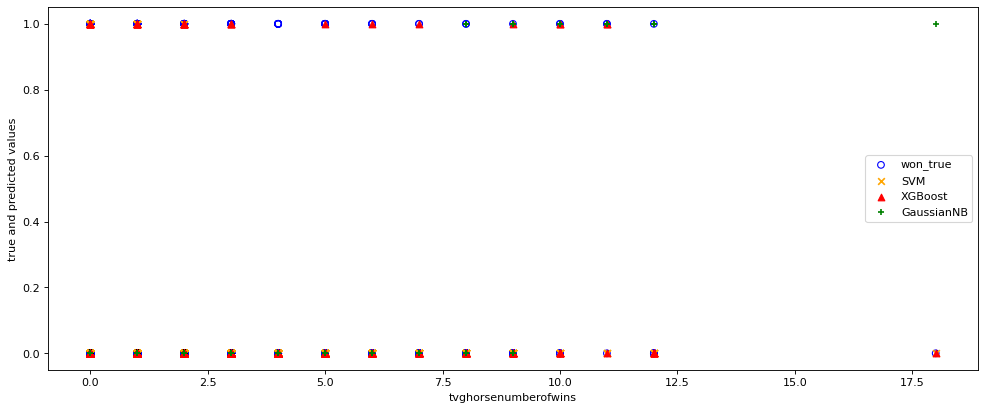

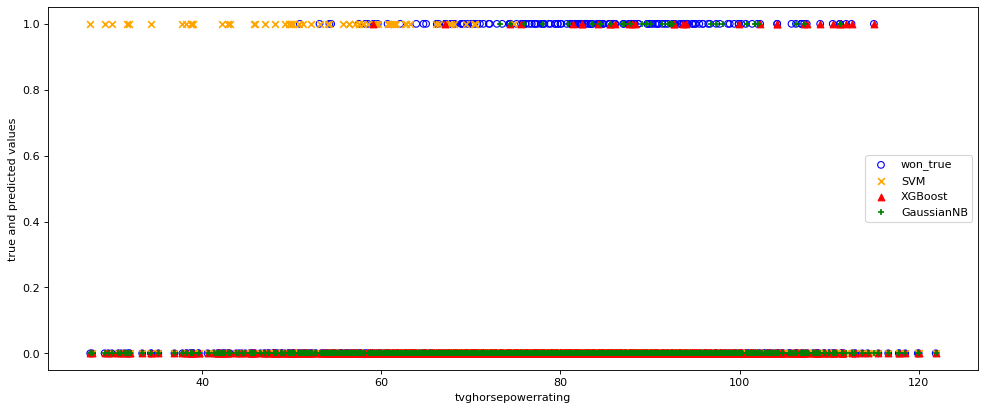

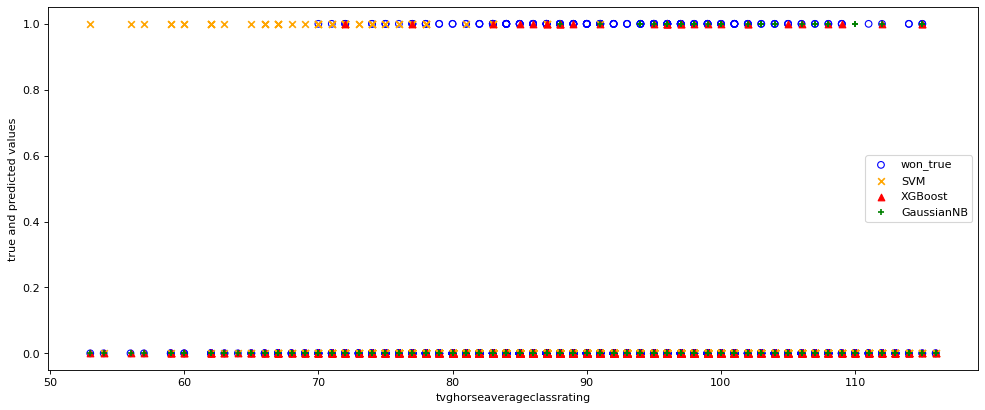

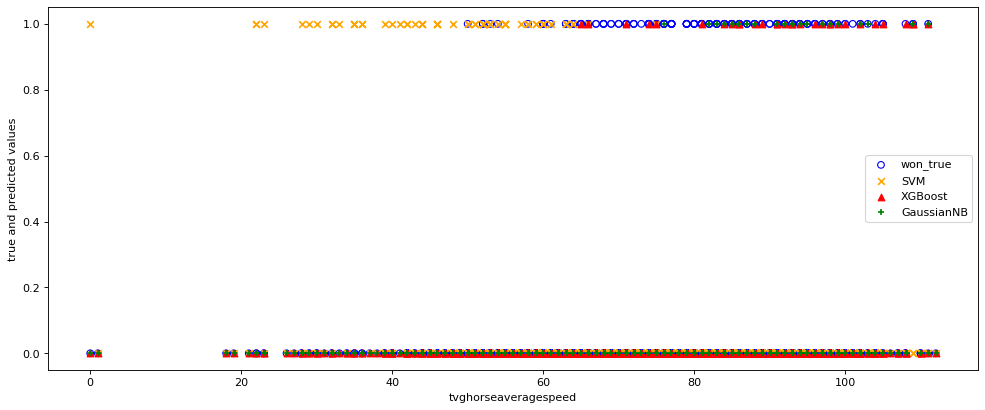

In [19]:
for i in features:
    plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(test_copy[i],test_copy['won'], marker='o', color='none', edgecolor='blue', label='won_true')
    plt.scatter(test_copy[i],test_copy['won_SVM'], marker='x', color='orange', label='SVM')
    plt.scatter(test_copy[i],test_copy['won_XGBoost'], marker='^', color='red', label='XGBoost')
    plt.scatter(test_copy[i],test_copy['won_GaussianNB'], marker='+', color='green', label='GaussianNB')
    plt.legend()
    plt.xlabel(i)
    plt.ylabel('true and predicted values')
    plt.show()
    

In [20]:
test_copy.to_csv('test_data_and_predictions.csv', index=False)

In [21]:
final_df = pd.read_csv('test_data_and_predictions.csv')

In [22]:
final_df.columns

Index(['racedater', 'tvgtrackcode', 'race', 'bettinginterestnumber',
       'horsename', 'morninglineodds', 'currentodds', 'tvghorseweight',
       'tvghorsedamsirename', 'tvghorseage', 'tvghorsesex', 'tvghorsedaysoff',
       'tvghorsenumberofwins', 'tvghorsenumberofstarts', 'tvghorsepowerrating',
       'tvghorseaveragespeed', 'tvghorseaverageclassrating', 'currentodds.1',
       'winpayout', 'placepayout', 'showpayout', 'scratched', 'won', 'won_SVM',
       'won_XGBoost', 'won_GaussianNB'],
      dtype='object')

In [23]:
cols = [
    'racedater',
    'race',
    'horsename',
    'tvghorseweight', 
    'tvghorseage', 
    'tvghorsedaysoff', 
    'tvghorsenumberofwins', 
    'tvghorsepowerrating', 
    'tvghorseaverageclassrating',
    'tvghorseaveragespeed',
    'won',
    'won_SVM',
    'won_XGBoost',
    'won_GaussianNB'
]

selected_final_df = final_df[cols]

won_svm = selected_final_df.loc[(selected_final_df.won == 1) & (selected_final_df.won_SVM == 1)]
won_xgboost = selected_final_df.loc[(selected_final_df.won == 1) & (selected_final_df.won_XGBoost == 1)]
won_gaussian = selected_final_df.loc[(selected_final_df.won == 1) & (selected_final_df.won_GaussianNB == 1)]

lost_svm = selected_final_df.loc[(selected_final_df.won == 0) & (selected_final_df.won_SVM == 0)]
lost_xgboost = selected_final_df.loc[(selected_final_df.won == 0) & (selected_final_df.won_XGBoost == 0)]
lost_gaussian = selected_final_df.loc[(selected_final_df.won == 0) & (selected_final_df.won_GaussianNB == 0)]

In [24]:
cols_rename = {
    'racedater':'Date',
    'race':'Race',
    'horsename':'Name',
    'tvghorseweight':'Weight', 
    'tvghorseage':'Age', 
    'tvghorsedaysoff':'Days off', 
    'tvghorsenumberofwins':'Number of Wins', 
    'tvghorsepowerrating':'Power Rating', 
    'tvghorseaverageclassrating':'Average Class Rating',
    'tvghorseaveragespeed':'Average Speed',
    'won':'Won',
    'won_SVM':'Won SVM',
    'won_XGBoost':'Won XGBoost',
    'won_GaussianNB':'Won GaussianNB'
}

In [25]:
won_svm.rename(columns = cols_rename, inplace=True)
won_svm

,Date,Race,Name,Weight,Age,Days off,Number of Wins,Power Rating,Average Class Rating,Average Speed,Won,Won SVM,Won XGBoost,Won GaussianNB
476,2020-06-05,6,orb's soul,118,3,18,0,59.6,70,60,1,1,0,0
595,2020-05-31,6,whoville,118,3,51,0,53.1,72,52,1,1,0,0
1083,2020-06-18,1,jamin's jet,120,2,23,0,59.2,74,52,1,1,0,0


In [26]:
won_xgboost.rename(columns = cols_rename, inplace=True)
won_xgboost

,Date,Race,Name,Weight,Age,Days off,Number of Wins,Power Rating,Average Class Rating,Average Speed,Won,Won SVM,Won XGBoost,Won GaussianNB
86,2020-06-20,9,factor this,122,5,90,7,111.9,108,102,1,0,1,0
124,2020-06-25,3,dutch treat,118,5,39,0,59.1,88,74,1,0,1,0
197,2020-06-26,8,spectacular gem,122,4,131,3,99.9,102,93,1,0,1,0
258,2020-06-26,7,intrepid heart,122,4,89,2,82.4,100,93,1,0,1,0
345,2020-06-11,9,tizahra,125,4,73,0,88.3,83,71,1,0,1,0
376,2020-06-07,3,petrov,118,6,12,5,86.1,106,88,1,0,1,0
416,2020-06-07,7,lead guitar,123,4,232,1,84.2,86,89,1,0,1,0
569,2020-06-14,6,guska mon shoes,118,10,15,11,74.4,96,85,1,0,1,1
588,2020-06-14,8,catch a bid,122,4,239,2,94.0,96,98,1,0,1,0
612,2020-05-31,8,crystal cliffs (fr),118,3,167,0,104.2,91,97,1,0,1,0


In [27]:
won_gaussian.rename(columns = cols_rename, inplace=True)
won_gaussian

,Date,Race,Name,Weight,Age,Days off,Number of Wins,Power Rating,Average Class Rating,Average Speed,Won,Won SVM,Won XGBoost,Won GaussianNB
569,2020-06-14,6,guska mon shoes,118,10,15,11,74.4,96,85,1,0,1,1
703,2020-06-27,2,frost or frippery,123,7,36,12,92.0,95,92,1,0,0,1
764,2020-06-27,9,midnight bisou,124,5,118,11,107.2,112,111,1,0,1,1
771,2020-06-27,10,tom's d'etat,124,7,76,10,111.2,115,109,1,0,1,1
890,2020-06-27,10,tom's d'etat,124,7,76,10,111.2,115,109,1,0,1,1


In [28]:
won_svm.to_csv('won_svm.csv', index=False)

In [29]:
won_xgboost.to_csv('won_xgboost.csv', index=False)

In [30]:
won_gaussian.to_csv('won_gaussian.csv', index=False)

In [31]:
lost_svm.rename(columns = cols_rename, inplace=True)
lost_svm

,Date,Race,Name,Weight,Age,Days off,Number of Wins,Power Rating,Average Class Rating,Average Speed,Won,Won SVM,Won XGBoost,Won GaussianNB
0,2020-06-20,1,epic west,118,3,160,0,27.7,92,1,0,0,0,0
1,2020-06-20,1,spelling bee,118,3,28,0,68.4,78,69,0,0,0,0
3,2020-06-20,1,ugo,118,3,13,0,66.8,84,64,0,0,0,0
4,2020-06-20,1,conquistador show,118,3,105,0,65.8,81,65,0,0,0,0
5,2020-06-20,1,suspect,124,4,20,0,72.8,86,64,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2020-05-29,9,bebop shoes,123,5,26,1,88.6,96,83,0,0,0,0
1992,2020-05-29,9,out cold,123,4,179,1,69.8,81,75,0,0,0,0
1993,2020-05-29,9,irish spirit,123,5,24,0,78.4,97,89,0,0,0,0
1994,2020-05-29,9,alex's strike,123,4,35,1,84.4,87,80,0,0,0,0


In [32]:
lost_svm.to_csv('lost_svm.csv', index=False)

In [33]:
lost_xgboost.rename(columns = cols_rename, inplace=True)
lost_xgboost

,Date,Race,Name,Weight,Age,Days off,Number of Wins,Power Rating,Average Class Rating,Average Speed,Won,Won SVM,Won XGBoost,Won GaussianNB
0,2020-06-20,1,epic west,118,3,160,0,27.7,92,1,0,0,0,0
1,2020-06-20,1,spelling bee,118,3,28,0,68.4,78,69,0,0,0,0
3,2020-06-20,1,ugo,118,3,13,0,66.8,84,64,0,0,0,0
4,2020-06-20,1,conquistador show,118,3,105,0,65.8,81,65,0,0,0,0
5,2020-06-20,1,suspect,124,4,20,0,72.8,86,64,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2020-05-29,9,bebop shoes,123,5,26,1,88.6,96,83,0,0,0,0
1992,2020-05-29,9,out cold,123,4,179,1,69.8,81,75,0,0,0,0
1993,2020-05-29,9,irish spirit,123,5,24,0,78.4,97,89,0,0,0,0
1994,2020-05-29,9,alex's strike,123,4,35,1,84.4,87,80,0,0,0,0


In [34]:
lost_xgboost.to_csv('lost_xgboost.csv', index=False)

In [35]:
lost_gaussian.rename(columns = cols_rename, inplace=True)
lost_gaussian

,Date,Race,Name,Weight,Age,Days off,Number of Wins,Power Rating,Average Class Rating,Average Speed,Won,Won SVM,Won XGBoost,Won GaussianNB
0,2020-06-20,1,epic west,118,3,160,0,27.7,92,1,0,0,0,0
1,2020-06-20,1,spelling bee,118,3,28,0,68.4,78,69,0,0,0,0
3,2020-06-20,1,ugo,118,3,13,0,66.8,84,64,0,0,0,0
4,2020-06-20,1,conquistador show,118,3,105,0,65.8,81,65,0,0,0,0
5,2020-06-20,1,suspect,124,4,20,0,72.8,86,64,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,2020-05-29,9,bebop shoes,123,5,26,1,88.6,96,83,0,0,0,0
1992,2020-05-29,9,out cold,123,4,179,1,69.8,81,75,0,0,0,0
1993,2020-05-29,9,irish spirit,123,5,24,0,78.4,97,89,0,0,0,0
1994,2020-05-29,9,alex's strike,123,4,35,1,84.4,87,80,0,0,0,0


In [36]:
lost_gaussian.to_csv('lost_gaussian.csv', index=False)